In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

from utils import load_data
from preprocessing import prep_monthly_sales_by_country, prep_top5_total_sales_by_country
from preprocessing import focus_on_uk, generate_keywords
from visualizing import plot_monthly_sales_by_country, plot_top5_total_sales_by_country


In [2]:
data_orig = load_data()

Current Working Directory: /home/rhycha/Desktop/_Drawer/_Missions/W2024-courses/datascience/ecommerce-transaction-data-analysis/app/src


In [3]:
data_orig.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
data = prep_monthly_sales_by_country(data_orig)
data.head()

Country      Australia  Austria  Bahrain  Belgium  Brazil  Canada  \
InvoiceDate                                                         
2010-12-31     1032.85   277.20   205.74  1809.91     0.0    0.00   
2011-01-31     9017.71     0.00     0.00  1200.20     0.0    0.00   
2011-02-28    14695.42   518.36     0.00  2181.07     0.0    0.00   
2011-03-31    17223.99  1708.12     0.00  3351.98     0.0  140.54   
2011-04-30      771.60   680.78     0.00  1989.48  1143.6    0.00   

Country      Channel Islands   Cyprus  Czech Republic  Denmark  ...  RSA  \
InvoiceDate                                                     ...        
2010-12-31            363.53  1590.82            0.00  1281.50  ...  0.0   
2011-01-31            675.58   547.50            0.00     0.00  ...  0.0   
2011-02-28           1784.71  4334.24          549.26   399.22  ...  0.0   
2011-03-31           3509.33   938.39            0.00  3978.99  ...  0.0   
2011-04-30            293.00     0.00            0.00     0.

/home/rhycha/Desktop/_Drawer/_Missions/W2024-courses/datascience/ecommerce-transaction-data-analysis/app/src/preprocessing.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSales'] = data['Quantity'] * data['UnitPrice']


Country      Australia  Austria  Bahrain  Belgium  Brazil  Canada  \
InvoiceDate                                                         
2010-12-31     1032.85   277.20   205.74  1809.91     0.0    0.00   
2011-01-31     9017.71     0.00     0.00  1200.20     0.0    0.00   
2011-02-28    14695.42   518.36     0.00  2181.07     0.0    0.00   
2011-03-31    17223.99  1708.12     0.00  3351.98     0.0  140.54   
2011-04-30      771.60   680.78     0.00  1989.48  1143.6    0.00   

Country      Channel Islands   Cyprus  Czech Republic  Denmark  ...  RSA  \
InvoiceDate                                                     ...        
2010-12-31            363.53  1590.82            0.00  1281.50  ...  0.0   
2011-01-31            675.58   547.50            0.00     0.00  ...  0.0   
2011-02-28           1784.71  4334.24          549.26   399.22  ...  0.0   
2011-03-31           3509.33   938.39            0.00  3978.99  ...  0.0   
2011-04-30            293.00     0.00            0.00     0.00  ...  0.0   

Country      Saudi Arabia  Singapore     Spain   Sweden  Switzerland     USA  \
InvoiceDate                                                                    
2010-12-31           0.00       0.00   1843.73  3834.30      1304.92    0.00   
2011-01-31           0.00    2053.07  10086.09  3486.32      4231.23    0.00   
2011-02-28         145.92       0.00   2114.50   509.50      2654.92    0.00   
2011-03-31           0.00       0.00   5363.15  4720.58      1870.23    0.00   
2011-04-30           0.00    8209.58   1785.65   809.10      2076.94  383.95   

Country      United Arab Emirates  United Kingdom  Unspecified  
InvoiceDate                                                     
2010-12-31                   0.00      748268.980          0.0  
2011-01-31                   0.00      561289.980          0.0  
2011-02-28                 889.24      430027.950          0.0  
2011-03-31                   0.00      586230.280          0.0  
2011-04-30                   0.00      476517.761        299.1  

[5 rows x 38 columns]

In [5]:
# save data frame to csv at ../data/
data.to_csv('../data/monthly_sales_by_country.csv')

# The reason why the last month sales decrease is because it is not entire month.
# TODO: could be imporved If i add daily sales

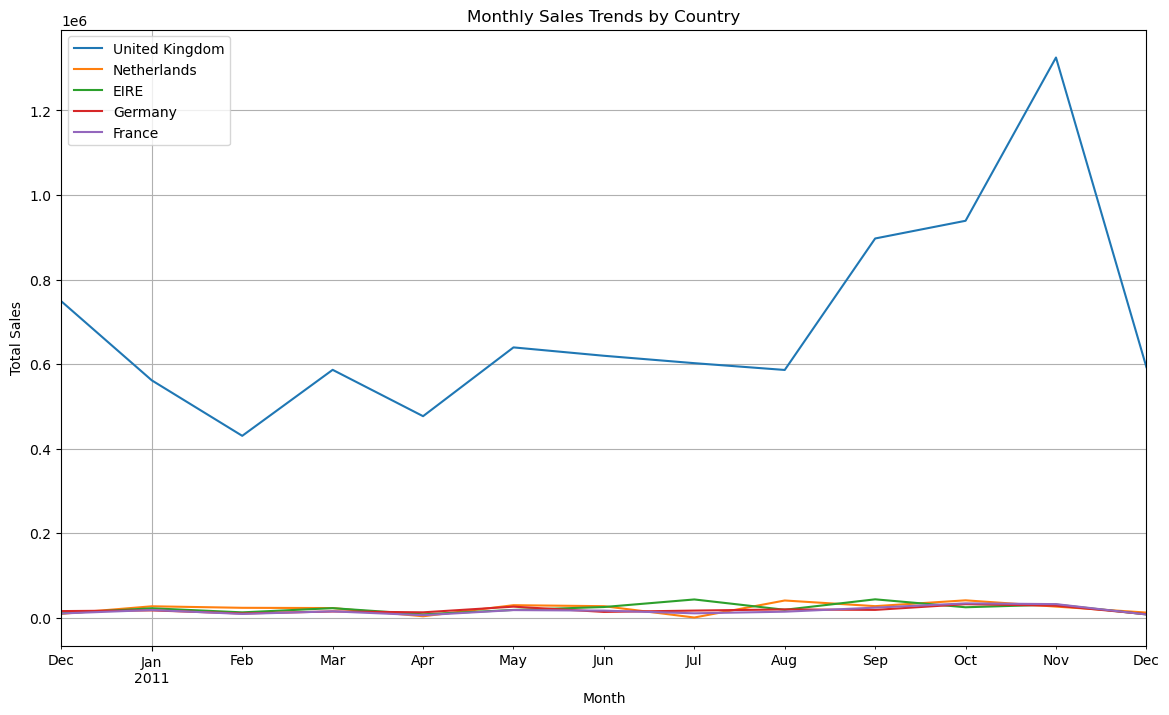

In [6]:
plot_monthly_sales_by_country(data)

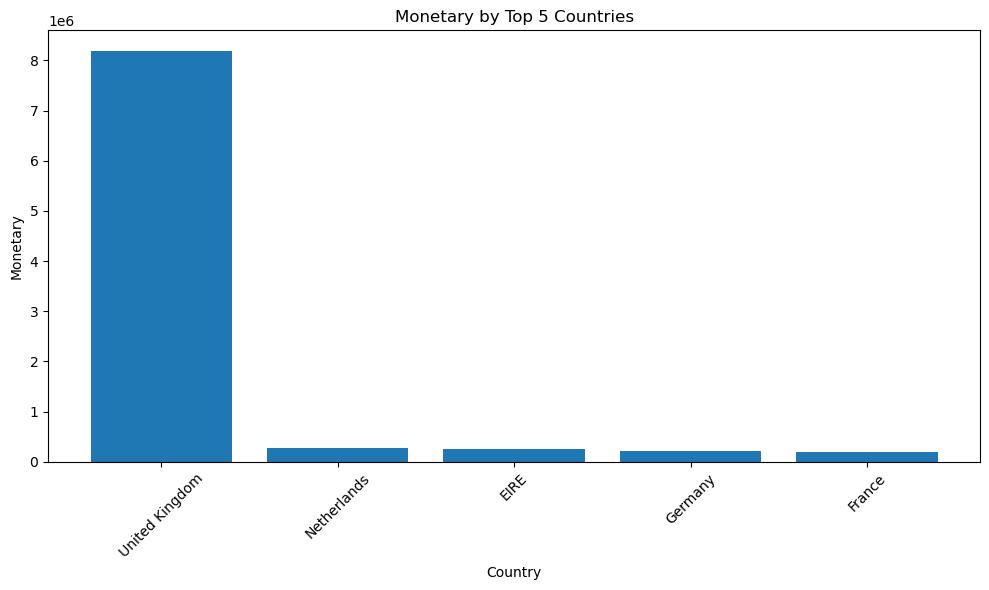

In [7]:
data_top5 = prep_top5_total_sales_by_country(data_orig)
data_top5.head()
plot_top5_total_sales_by_country(data_top5)

In [8]:
# save data frame to csv at ../data/
data.to_csv('../data/top5_countries_for_sales.csv')

In [9]:
data_uk = focus_on_uk(data_orig)
print(data_uk.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice CustomerID         Country  TotalSales  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom

In [10]:
keyword_data = generate_keywords(data_orig)
# save keyword data frame to csv at ../data/   
keyword_data.to_csv('../data/uk_keywords.csv')

Cleaned Descriptions:
0      white hanging heart tlight holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
Name: Description, dtype: object
Expanded Words:
0      white
0    hanging
0      heart
0     tlight
0     holder
Name: Keyword, dtype: object
Keywords Associated with Sales:
   TotalSales  Keyword
0        15.3    white
0        15.3  hanging
0        15.3    heart
0        15.3   tlight
0        15.3   holder
Aggregated Sales by Keyword:
Keyword
set          5717733.22
of           4426400.43
bag          4319766.59
red          3808871.74
heart        3211939.86
vintage      2911824.47
retrospot    2894993.14
white        2390354.34
jumbo        2329758.10
design       2319693.07
Name: TotalSales, dtype: float64
